## Análise exploratória de dados

In [1]:
# Bibliotecas
import numpy as np
import pandas as pd 
import warnings

warnings.filterwarnings('ignore')

c:\Users\Matheus\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# importando dataset
cuisine_rating = pd.read_csv('Cuisine_rating.csv')

In [3]:
# Visualizando 5 primeiras linhas do Dataset
cuisine_rating.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [4]:
# Verificar o carregamento do dataset
cuisine_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


In [5]:
# Verificando as frequências das culinarias
cuisine_rating['Cuisines'].value_counts()

Cuisines
Japanese    36
Filipino    34
French      34
Indian      32
Chinese     24
Seafood     22
Italian     18
Name: count, dtype: int64

In [6]:
# Verificando a média de notas da culinaria japonesa
cuisine_rating[cuisine_rating['Cuisines']=='Japanese']['Overall Rating'].mean()

3.5972222222222223

In [7]:
# Estatisticas descritivas
cuisine_rating.describe()

,User ID,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,141.060000,1984.830000,3.815000,3.220000,3.230000,3.225000
std,57.879185,26.130257,16.809339,1.056578,1.411226,1.526022,1.079445
min,1.000000,101.000000,1955.000000,1.000000,1.000000,1.000000,1.000000
25%,50.750000,123.000000,1971.000000,3.000000,2.000000,2.000000,2.500000
50%,100.500000,135.000000,1987.000000,4.000000,3.000000,3.000000,3.000000
75%,150.250000,158.000000,2000.000000,5.000000,5.000000,5.000000,4.000000
max,200.000000,199.000000,2009.000000,5.000000,5.000000,5.000000,5.000000


In [8]:
# Sumarização dos dados de localização
cuisine_rating['Location'].value_counts()

Location
St. George,NY         46
Upper East Side,NY    30
Riverdale,NY          28
Central Park,NY       24
China Town, NY        22
Market City, NY       20
Upper West Side,NY    18
Central Park,ny        8
Market City, MY        2
Cedar Hill, NY         2
Name: count, dtype: int64

In [9]:
# Pegando somente as colunas numéricas
numeric_cols = cuisine_rating.select_dtypes(include=np.number).columns.to_list()

cuisine_rating.groupby(['Location','Cuisines'])[numeric_cols].mean()

User ID   Area code          YOB    Budget  \
Location           Cuisines                                                  
Cedar Hill, NY     Indian    141.000000  169.500000  1960.000000  4.000000   
Central Park,NY    Chinese    60.000000  129.000000  1995.000000  4.000000   
                   Filipino   83.666667  144.166667  1990.666667  3.333333   
                   French    116.000000  144.750000  2003.500000  4.000000   
                   Indian     77.000000  131.500000  2001.000000  3.000000   
                   Italian   115.000000  152.500000  1996.000000  4.000000   
                   Japanese   98.000000  138.500000  2002.000000  2.500000   
                   Seafood    80.500000  149.500000  1980.000000  3.000000   
Central Park,ny    Filipino  108.000000  162.500000  1962.000000  3.000000   
                   French     97.000000  117.500000  1976.000000  3.000000   
                   Indian     79.500000  137.000000  1986.000000  4.000000   
China Town, NY     Chinese    96.000000  106.500000  1976.000000  3.000000   
                   Filipino  130.000000  125.000000  1998.000000  1.000000   
                   French    130.500000  149.000000  1965.000000  3.500000   
                   Indian     93.333333  129.333333  1983.666667  4.333333   
                   Seafood   100.250000  135.000000  1991.750000  3.500000   
Market City, MY    Indian     82.000000  156.500000  1971.000000  1.000000   
Market City, NY    Filipino   92.000000  158.000000  1967.000000  5.000000   
                   French    105.000000  156.250000  1975.500000  4.000000   
                   Indian    122.000000  169.000000  1977.500000  3.000000   
                   Japanese  114.000000  152.333333  1981.333333  4.666667   
                   Seafood    77.000000  144.750000  1981.000000  3.000000   
Riverdale,NY       Chinese    77.000000  121.000000  1985.000000  4.500000   
                   Filipino  104.666667  116.666667  1966.333333  4.333333   
                   French    116.000000  150.500000  1975.000000  4.000000   
                   Italian    81.000000  124.333333  1981.000000  3.666667   
                   Japanese  105.750000  135.250000  1994.500000  4.500000   
                   Seafood    67.000000  133.000000  2007.000000  5.000000   
St. George,NY      Chinese    62.500000  124.000000  1984.500000  4.500000   
                   Filipino  121.166667  136.083333  1991.000000  4.000000   
                   French    109.500000  127.875000  1986.750000  4.500000   
                   Indian     96.500000  145.625000  1987.500000  3.375000   
                   Italian   101.000000  155.250000  1975.000000  2.500000   
                   Japanese  107.800000  140.800000  1985.200000  4.400000   
Upper East Side,NY Chinese   120.000000  159.400000  1980.000000  4.000000   
                   Filipino   58.000000  159.500000  2003.000000  3.000000   
                   French    101.666667  145.833333  1982.666667  3.666667   
                   Indian    124.000000  172.500000  1994.000000  3.000000   
                   Italian    93.000000  157.750000  1986.000000  5.000000   
                   Japanese   57.666667  148.666667  1988.666667  3.666667   
Upper West Side,NY Chinese   147.000000  146.000000  2000.000000  4.000000   
                   Filipino  106.000000  145.500000  1991.000000  4.000000   
                   French    136.000000  140.000000  1999.500000  4.000000   
                   Indian     83.000000  141.500000  1995.000000  3.000000   
                   Italian   110.000000  128.500000  1959.000000  5.000000   
                   Japanese  112.000000  123.500000  1955.000000  4.000000   
                   Seafood    75.500000  123.500000  1982.000000  4.000000   

                             Food Rating  Service Rating  Overall Rating  
Location           Cuisines                                               
Cedar Hill, NY     Indian       2.000000        5.000000   

# Dados Faltantes e Dados constantes

- **Dados constantes**: caso exista uma coluna (variável) preenchida com o mesmo dado, podemos avaliar de removê-la do dataset
pois pode onerar em questão de processamento e a variável pode não ser importante para a análise.

```python
# Comando para remover a coluna 
df = df.drop(columns = ['Nome da Coluna'])
```
- **Dados Nulos (NAN)** = A informação **NAN** é umproblema pois ao realizarmos algum cálculo (média) este tipo de dado será desconsiderado do cálculo, influenciando o cálculo especialmente se a quantidade de valores **NAN** for grande. Para tratarmos esse tipo de dado:
1. Excluir a linha com dados **NAN**: Essa opção não é a mais correta pois perdemos todas as outras informações relacionadas diminuindo o tamanho do dataset.
2. Calcular alguma estatística descritiva preenchendo os **NAN** (não utilizar a média pois é varia de acordo com outliers)
```python
# Preenchendo com a mediana
houses_sp = houses_sp['rooms'].fillna(houses_sp['rooms'].median())
# Comando fillna preenche os valores nulos
```
**Não devemos preenhcer com 0 os dados NAN pois os tornamos não representativos e enviezados**

3. Tratar com o prenchimento da informação correta

## Tratamento de Outliers

Valores **outliers** são preocupantes pois distorcem algumas medidas de estatísticas descritiva compromentendo a análise, por isso requerem uma atenção maior **Devem ser removidos**.

Uma das das soluções é utilizar a Técnica IQR para filtrar os outliers:
```python
# IQR -> Distância inter quartil (Inter quantile range)

q1 = houses['bathroom'].quantile(0.25) ## Primeiro quartil
q3 = houses['bathroom'].quantile(0.75) ## terceiro quartil

IQR = q3 - q1

# Filtrando os valores outliers
df_outliers = houses[(houses['bathroom'] < Q1 - (IQR * 1.5)) | (houses['bathroom'] > q3 + (IQR * 1.5 ))]
```
**Para remover os outliers basta alterar o filtro acima**
```python
# Filtrando os valores outliers
df_outliers = houses[(houses['bathroom'] > Q1 - (IQR * 1.5)) & (houses['bathroom'] < q3 + (IQR * 1.5 ))]
```





## Utilizando Visualizações para variáveis categóricas

In [20]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [14]:
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Text(0.5, 1.0, 'Distribuição da Variável SepalLengthCm')

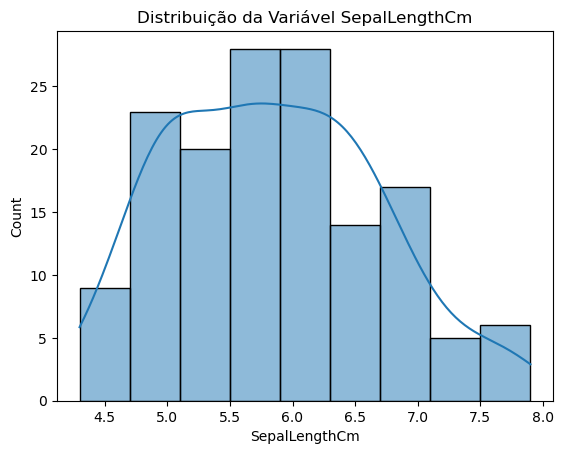

In [17]:
sns.histplot(data=iris, x='SepalLengthCm', kde=True).set_title('Distribuição da Variável SepalLengthCm')

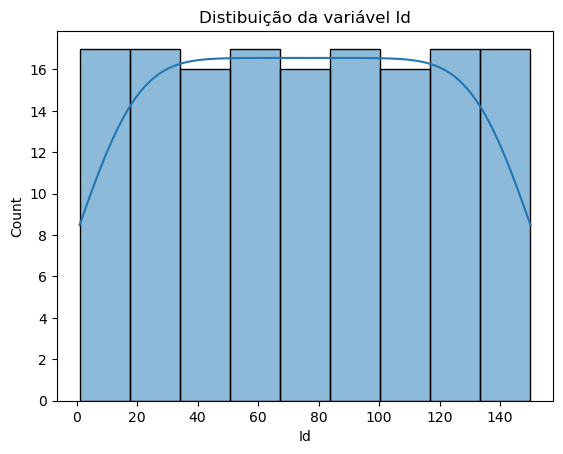

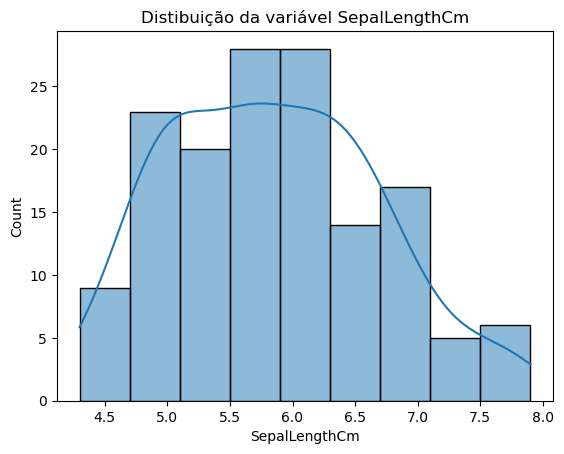

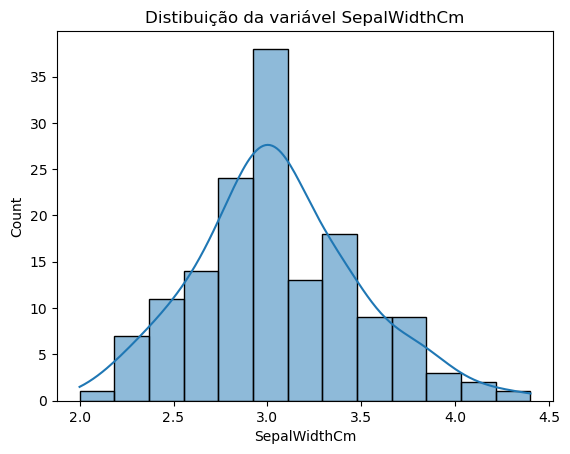

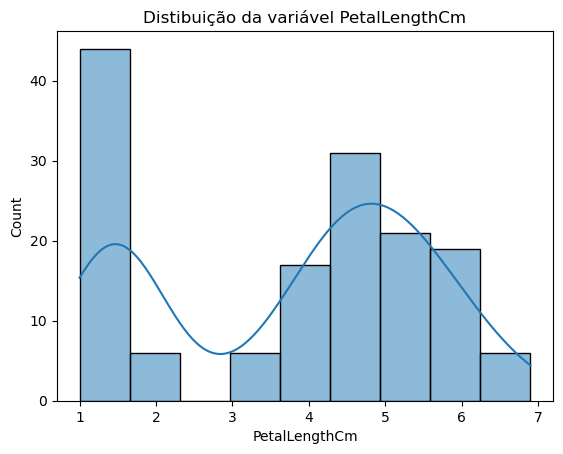

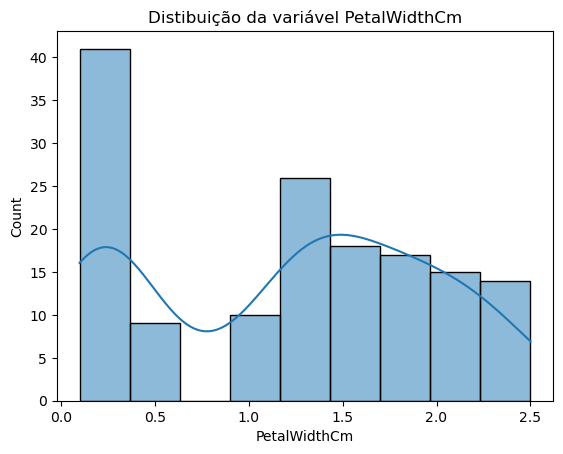

In [21]:
for col in iris.drop(columns='Species'):
    sns.histplot(data=iris,x=col, kde=True).set_title(f'Distibuição da variável {col}')
    plt.show()

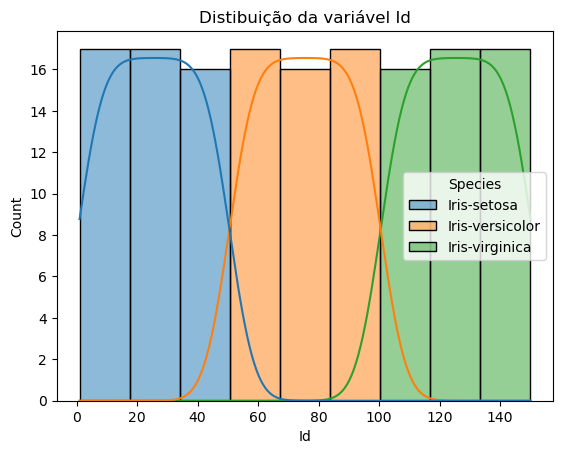

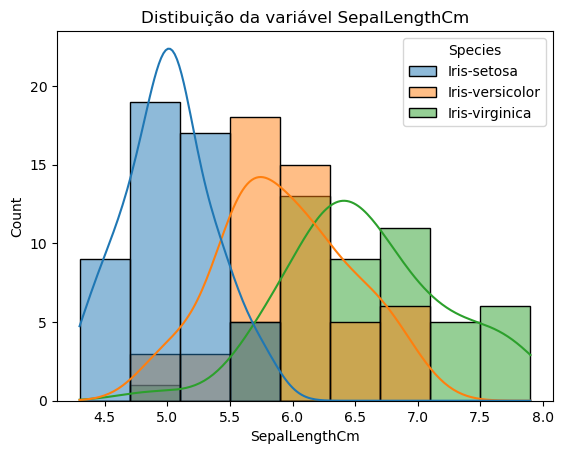

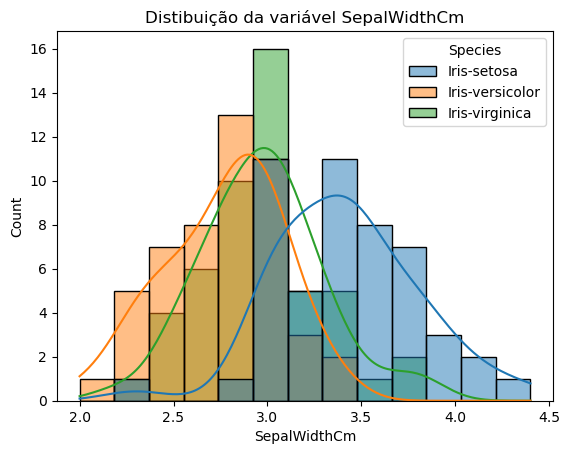

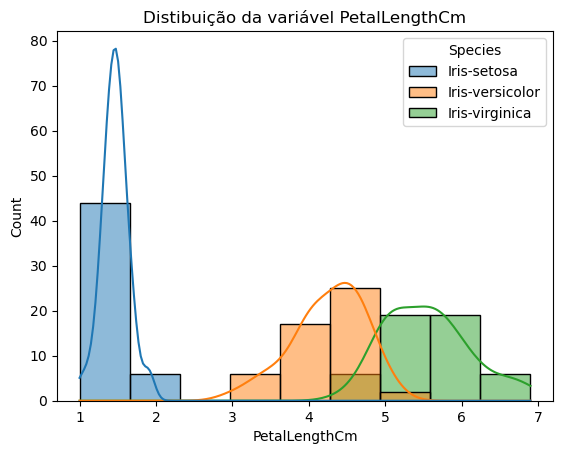

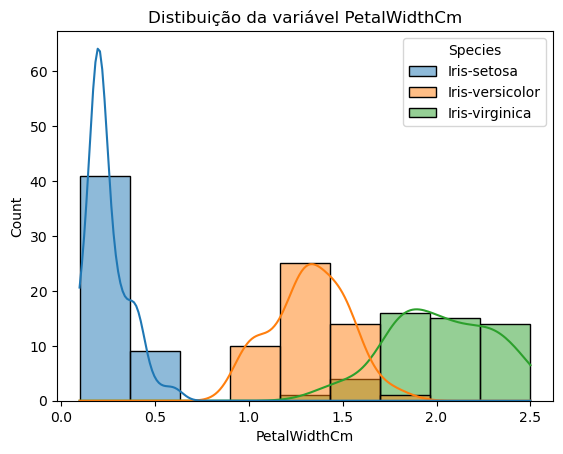

In [23]:
# Distribuição por espécie
for col in iris.drop(columns='Species'):
    sns.histplot(data=iris,x=col, kde=True, hue=iris['Species']).set_title(f'Distibuição da variável {col}')
    plt.show()

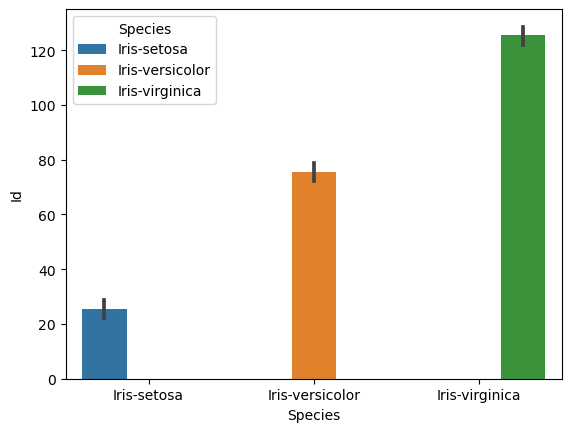

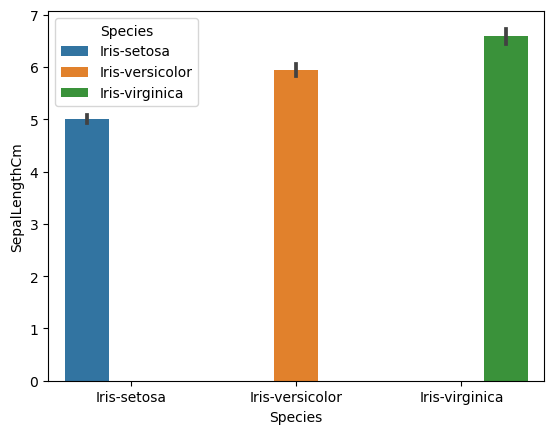

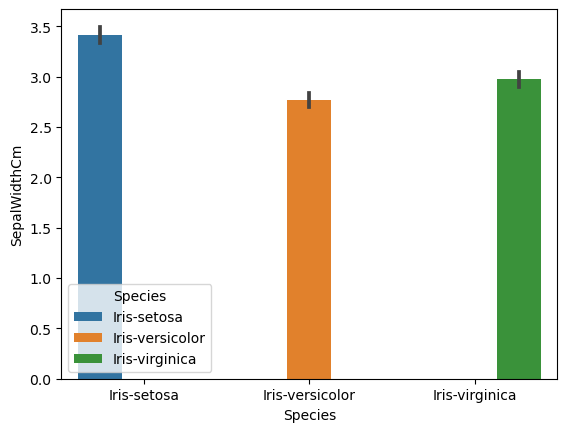

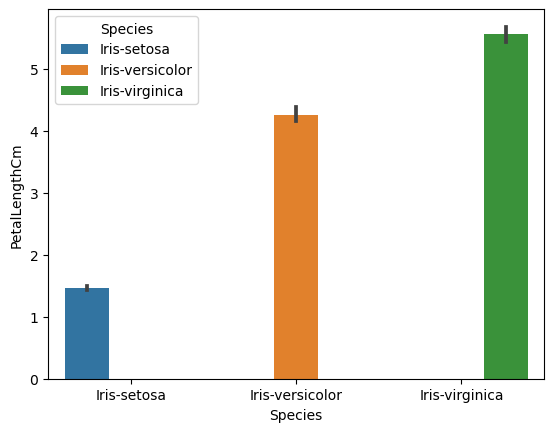

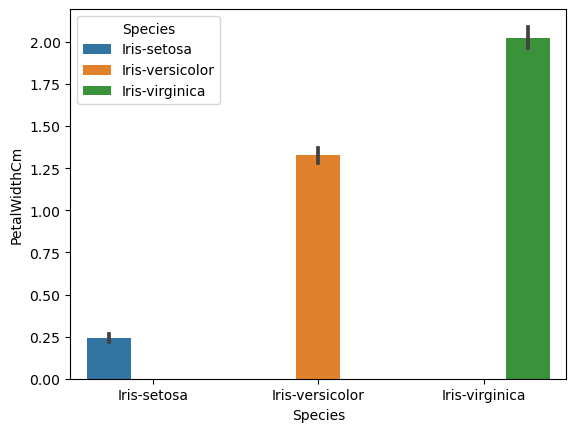

In [26]:
# Barplot
for col in iris.drop(columns='Species'):
    sns.barplot(data=iris, x=iris['Species'], hue=iris['Species'], y=col, ci=90)
    plt.show()

## Utilizando visualizações para séries históricas

In [39]:
candy = pd.read_csv('candy_production.csv')
candy.rename(columns={'IPG3113N': 'industrial_production'}, inplace=True)

In [40]:
candy.head()

,observation_date,industrial_production
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100


In [41]:
candy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   observation_date       548 non-null    object 
 1   industrial_production  548 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.7+ KB


In [42]:
# Convertendo a data
candy['observation_date'] = pd.to_datetime(candy['observation_date'])

In [43]:
candy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   observation_date       548 non-null    datetime64[ns]
 1   industrial_production  548 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.7 KB


<Axes: xlabel='observation_date'>

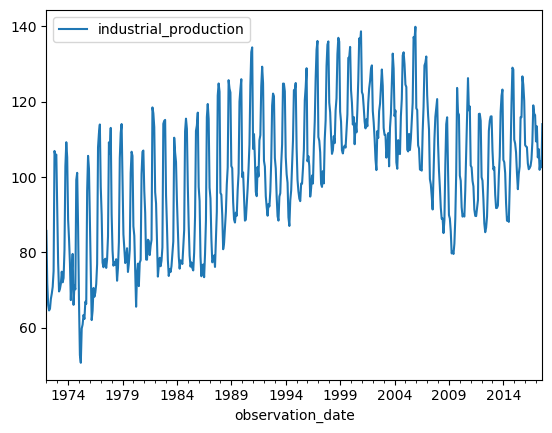

In [44]:
candy.plot(x='observation_date', y='industrial_production')

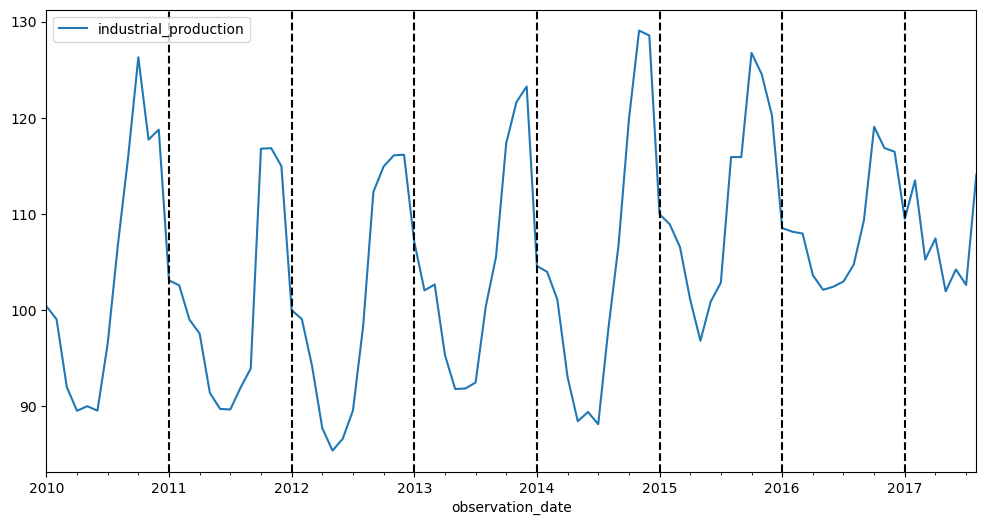

In [51]:
# Dados de 2010 para cima 
candy_filtered = candy[candy['observation_date'] >= '2010-01-01']
ax = candy_filtered.plot(x='observation_date', y='industrial_production', figsize=(12,6))
xcoords=['2011-01-01','2012-01-01','2013-01-01','2014-01-01','2015-01-01','2016-01-01','2017-01-01']
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')


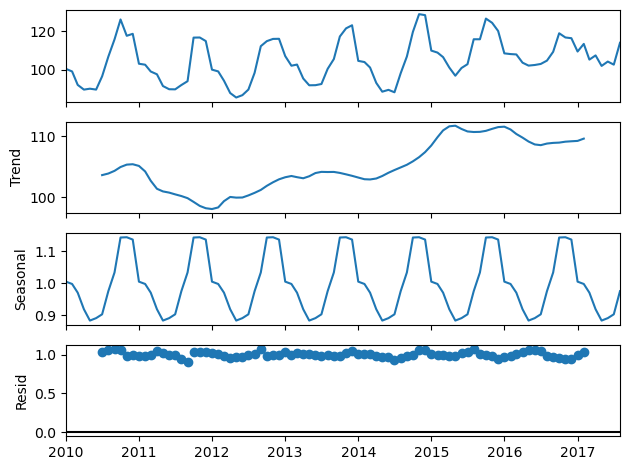

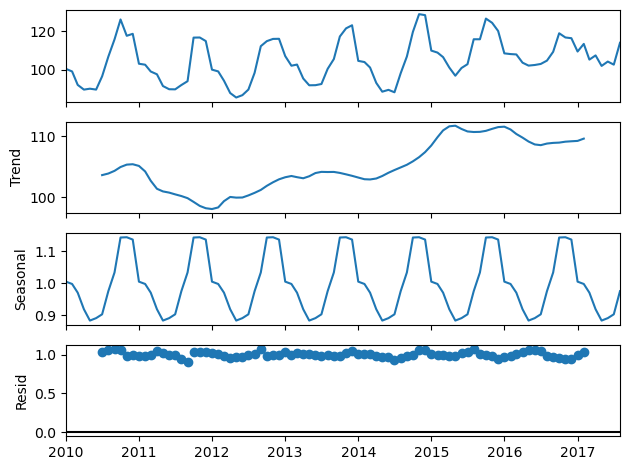

In [52]:
# Decomposição de sazonalidade
from statsmodels.tsa.seasonal import seasonal_decompose

candy_filtered.set_index('observation_date', inplace=True)

analysis = candy_filtered[['industrial_production']].copy()

decompose_result = seasonal_decompose(analysis, model='multiplicative')

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot()



## Entendendo como as variáveis se relacionam

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
penguins =sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [56]:
#verificando os tipos de pinguins 
penguins['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [57]:
# Para gerar a correlação não podemos deixar valores textuais
penguins_numerics = penguins.drop(columns=['species', 'island','sex'])
penguins_numerics.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

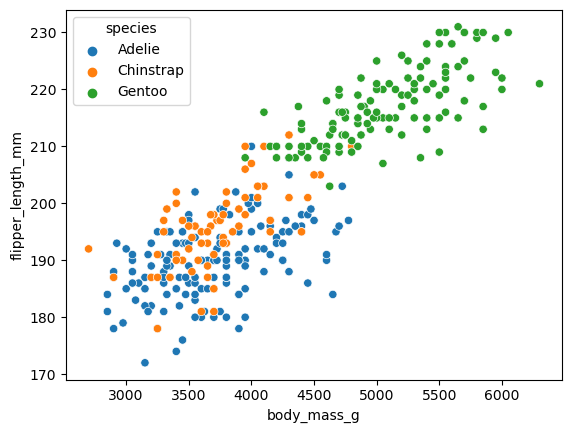

In [58]:
sns.scatterplot(x='body_mass_g', y='flipper_length_mm', hue='species', data=penguins)

As variáveis tamanho da nadadeira e massa não são boas para fazer a separação das 3 categorias 

<Axes: xlabel='body_mass_g', ylabel='bill_length_mm'>

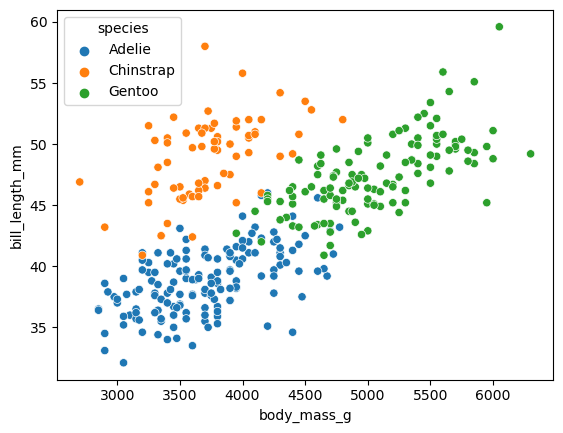

In [67]:
sns.scatterplot(x='body_mass_g', y='bill_length_mm', hue='species', data=penguins)

comprimento do bico e massa é uma boa variável para separação, existe um indício que precisa ser validado estatísticamente que podemos realizar as classificações por esta combinação.

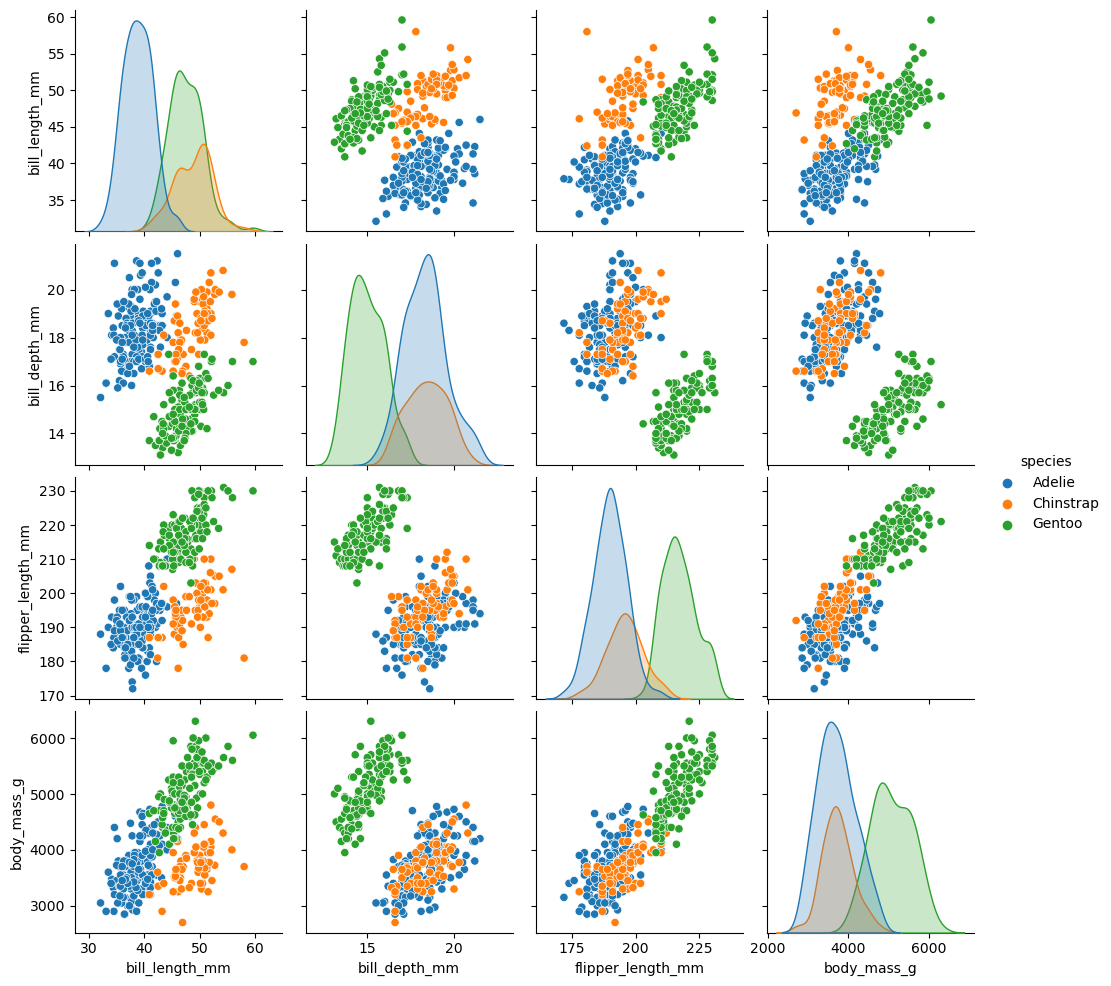

In [69]:
sns.pairplot(data=penguins, hue='species')

## Construindo perguntas para motivar as análises

1 - Entender o contexto em que a análise vai ser feita
2 - Observar restrições (tempo adequado)
3 - Começar com perguntas abertas
 1. Como as variáveis se relacionam entre si ?
 2. Há indicios de sazonalidade nas vendas do meu produto ?
4 - Perguntas fechadas
 1. O impacto da sazonalidade é positivo ?
 2. % de aumento quando sazonalidade sobe ?

4 - Conclusão objetiva 
5 - Comunicação acessível (ajuda nos gráficos e interpretações para gerar impacto)